In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_excel(r'CB_LU_Ana.xlsx')
df2 = pd.read_excel(r'ANA_12DIGIT.xlsx')

In [12]:
df.shape

(173, 7)

In [4]:
df.head()

,OBJECTID,gridcode,DNR12DIG,Shape_Leng,Shape_Area,Acres,Land_Use
0,1,1,21402050808,142674.773634,5.530583e+05,136.663680,1
1,2,1,21402050811,131332.592450,4.578880e+05,113.146581,1
2,3,1,21402050814,85184.904369,3.494063e+05,86.340186,1
3,4,1,21402050815,195314.624017,8.061349e+05,199.200273,1
4,5,1,21402050816,416478.297400,2.083684e+06,514.889435,1


In [14]:
df2.DNR12DIG.unique()

array([21402050824, 21402050823, 21402050821, 21402050822, 21402050826,
       21402050818, 21402050825, 21402050816, 21402050808, 21402050814,
       21402050809, 21402050815, 21402050811])

In [21]:
# watershed?
# 13 items
df.DNR12DIG.unique()

array([21402050808, 21402050811, 21402050814, 21402050815, 21402050816,
       21402050818, 21402050821, 21402050822, 21402050823, 21402050824,
       21402050825, 21402050826, 21402050809])

In [22]:
# four items in "impervious"
imper = [1,2,3,14]
per = [4,5,6,7,8,9,10,11,12,13,15,16]

In [23]:
len(df.gridcode.unique()), df.gridcode.unique()

(16, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]))

In [24]:
df.describe()

,OBJECTID,gridcode,DNR12DIG,Shape_Leng,Shape_Area,Acres,Land_Use
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000
mean,87.000000,8.375723,2.140205e+10,2.958211e+05,1.254462e+06,309.984252,8.375723
std,50.084928,4.694491,5.630087e+00,5.713652e+05,2.316974e+06,572.536806,4.694491
min,1.000000,1.000000,2.140205e+10,5.917650e+00,8.861815e-01,0.000219,1.000000
25%,44.000000,4.000000,2.140205e+10,1.436685e+04,1.093985e+05,27.032966,4.000000
50%,87.000000,8.000000,2.140205e+10,9.443931e+04,5.252815e+05,129.799890,8.000000
75%,130.000000,12.000000,2.140205e+10,3.191163e+05,1.338490e+06,330.748031,12.000000
max,173.000000,16.000000,2.140205e+10,3.700301e+06,1.918054e+07,4739.613796,16.000000


## calculate pollution

In [25]:
df['pollution'] = 0.

for i in range(len(df)):
    if df.iloc[i, 1] in imper:
        df.set_value(i, 'pollution', df.iloc[i, 5]*(15.3+1.69+880))
    else:
        df.set_value(i, 'pollution', df.iloc[i, 5]*(10.8+0.43+140))

In [26]:
df.head()

,OBJECTID,gridcode,DNR12DIG,Shape_Leng,Shape_Area,Acres,Land_Use,pollution
0,1,1,21402050808,142674.773634,5.530583e+05,136.663680,1,122585.954077
1,2,1,21402050811,131332.592450,4.578880e+05,113.146581,1,101491.351589
2,3,1,21402050814,85184.904369,3.494063e+05,86.340186,1,77446.283416
3,4,1,21402050815,195314.624017,8.061349e+05,199.200273,1,178680.652455
4,5,1,21402050816,416478.297400,2.083684e+06,514.889435,1,461850.674320


In [27]:
df['total_N'] = 0.
df['total_P'] = 0.
df['total_S'] = 0.

for i in range(len(df)):
    if df.iloc[i, 1] in imper:
        df.set_value(i, 'total_N', df.iloc[i, 5]*15.3)
        df.set_value(i, 'total_P', df.iloc[i, 5]*1.69)
        df.set_value(i, 'total_S', df.iloc[i, 5]*880)
    else:
        df.set_value(i, 'total_N', df.iloc[i, 5]*10.8)
        df.set_value(i, 'total_P', df.iloc[i, 5]*0.43)
        df.set_value(i, 'total_S', df.iloc[i, 5]*140)

In [28]:
df.head()

,OBJECTID,gridcode,DNR12DIG,Shape_Leng,Shape_Area,Acres,Land_Use,pollution,total_N,total_P,total_S
0,1,1,21402050808,142674.773634,5.530583e+05,136.663680,1,122585.954077,2090.954300,230.961619,120264.038159
1,2,1,21402050811,131332.592450,4.578880e+05,113.146581,1,101491.351589,1731.142688,191.217722,99568.991180
2,3,1,21402050814,85184.904369,3.494063e+05,86.340186,1,77446.283416,1321.004845,145.914914,75979.363656
3,4,1,21402050815,195314.624017,8.061349e+05,199.200273,1,178680.652455,3047.764170,336.648461,175296.239825
4,5,1,21402050816,416478.297400,2.083684e+06,514.889435,1,461850.674320,7877.808356,870.163145,453102.702819


In [13]:
# to .csv
# df.to_csv('CU-LU-Ana_claculated_03-30-2018.csv', index=False)

## calculations based on watershed

In [29]:
df.shape

(173, 11)

In [30]:
watersheds = df.groupby('DNR12DIG')['DNR12DIG', 'total_N', 'total_P', 'total_S'].sum()
print(watersheds)

                 DNR12DIG        total_N       total_P       total_S
DNR12DIG                                                            
21402050808  342432812928   22034.060108   1566.587347  7.203621e+05
21402050809   21402050809       0.003350      0.000370  1.927026e-01
21402050811  278226660543   19488.044495   1314.739969  5.924536e+05
21402050814  321030762210   14111.935147   1049.878295  4.907163e+05
21402050815  299628711410   39034.175239   2665.649969  1.207014e+06
21402050816  299628711424   67510.836680   5187.541086  2.451610e+06
21402050818  321030762270   61846.572976   4379.113344  2.010553e+06
21402050821  278226660673   10154.924802    726.654512  3.349321e+05
21402050822  342432813152  175583.737119  12203.652859  5.563738e+06
21402050823  321030762345  101111.275482   4805.915192  1.802756e+06
21402050824  321030762360   73757.712477   4685.093363  2.058838e+06
21402050825  299628711550   40764.941269   2568.337824  1.124615e+06
21402050826  256824609912   23044.

In [31]:
watersheds['watershed'] = watersheds.index

In [32]:
watersheds.drop('DNR12DIG', 1, inplace=True)

In [33]:
watersheds = watersheds[['watershed', 'total_N', 'total_P', 'total_S']]
print(watersheds)

               watershed        total_N       total_P       total_S
DNR12DIG                                                           
21402050808  21402050808   22034.060108   1566.587347  7.203621e+05
21402050809  21402050809       0.003350      0.000370  1.927026e-01
21402050811  21402050811   19488.044495   1314.739969  5.924536e+05
21402050814  21402050814   14111.935147   1049.878295  4.907163e+05
21402050815  21402050815   39034.175239   2665.649969  1.207014e+06
21402050816  21402050816   67510.836680   5187.541086  2.451610e+06
21402050818  21402050818   61846.572976   4379.113344  2.010553e+06
21402050821  21402050821   10154.924802    726.654512  3.349321e+05
21402050822  21402050822  175583.737119  12203.652859  5.563738e+06
21402050823  21402050823  101111.275482   4805.915192  1.802756e+06
21402050824  21402050824   73757.712477   4685.093363  2.058838e+06
21402050825  21402050825   40764.941269   2568.337824  1.124615e+06
21402050826  21402050826   23044.593208   1301.6

In [57]:
# to .csv
# watersheds.to_csv('CU-LU-Ana_claculated_watersheds_04-05-2018.csv', index=False)
watersheds.describe()

,watershed,total_N,total_P,total_S
count,1.300000e+01,13.000000,13.000000,1.300000e+01
mean,2.140205e+10,49880.216335,3265.756499,1.453738e+06
std,6.175842e+00,47797.869776,3196.684888,1.450870e+06
min,2.140205e+10,0.003350,0.000370,1.927026e-01
25%,2.140205e+10,19488.044495,1301.670361,5.410069e+05
50%,2.140205e+10,39034.175239,2568.337824,1.124615e+06
75%,2.140205e+10,67510.836680,4685.093363,2.010553e+06
max,2.140205e+10,175583.737119,12203.652859,5.563738e+06


In [56]:
#value range for N
(watersheds['total_N'].max())-(watersheds['total_N'].min())

175583.73376811141

In [53]:
#value range for P
(watersheds['total_P'].max())-(watersheds['total_P'].min())

12203.652488509881

In [54]:
#value range for S
(watersheds['total_S'].max())-(watersheds['total_S'].min())

5563738.2140059574

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import 

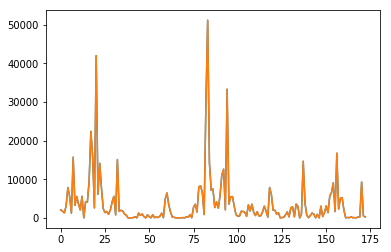

In [74]:
#df.set_index([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'watershed'])

#plt.plot(df.total_N)
#plt.show()



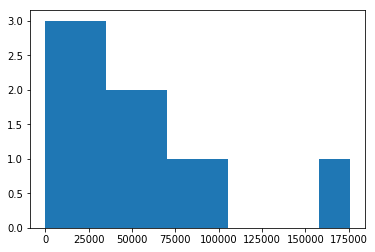

In [82]:
x = watersheds.watershed
y = watersheds.total_N
#df.plot.scatter(x,y)
plt.hist(y)
plt.show()

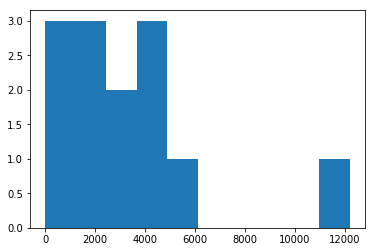

In [79]:
y = watersheds.total_P
plt.hist(y)
plt.show()

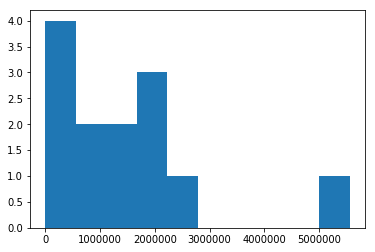

In [80]:
y = watersheds.total_S
plt.hist(y)
plt.show()

In [15]:
frame = [df, df2]

In [16]:
df3 = pd.concat(frame)

In [19]:
df3.head()

,Acres,CBI,DNR12DIG,HUA11,HUA14,HUA8,IMPRT_DATE,Land_Use,MDE6DIGT,MDE6NAME,MDE8DIGT,MDE8NAME,OBJECTID,OBJECTID_1,SHAPE_AREA,SHAPE_LEN,STRANAME,Shape_Area,Shape_Leng,gridcode
0,136.663680,NaN,21402050808,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,5.530583e+05,142674.773634,1.0
1,113.146581,NaN,21402050811,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,4.578880e+05,131332.592450,1.0
2,86.340186,NaN,21402050814,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3.494063e+05,85184.904369,1.0
3,199.200273,NaN,21402050815,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,8.061349e+05,195314.624017,1.0
4,514.889435,NaN,21402050816,NaN,NaN,NaN,NaT,1.0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,2.083684e+06,416478.297400,1.0
